In [3]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np


Using TensorFlow backend.


In [5]:
model = VGG16(weights=None,include_top= 'False')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
model.load_weights("vgg16_weights_tf_dim_ordering_tf_kernels.h5")

In [15]:
img_path = 'TestImages/2007_000032.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

(224, 224, 3)


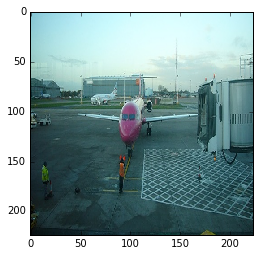

In [17]:
plt.imshow(np.asarray(img))
print(np.asarray(img).shape)

In [18]:
preds = model.predict(x)

In [19]:
print('Predicted:', decode_predictions(preds, top=3)[0])

('Predicted:', [(u'n02782093', u'balloon', 0.20173404), (u'n04467665', u'trailer_truck', 0.095309228), (u'n06874185', u'traffic_light', 0.062716097)])


In [11]:
print(model.get_layer('block5_pool').output_shape)

(None, 7, 7, 512)


In [ ]:
x = 